<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:crimson;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:white;
              text-align:center;'>
        NYC Public School Test Result Scores
    </h3>
    </div>

![New York City schoolbus](schoolbus.jpg)

Photo by [Austin Pacheco](https://unsplash.com/@austin_pacheco) on [Unsplash](https://unsplash.com).
<br>


Every year, American high school students take SATs, which are standardized tests intended to measure literacy, numeracy, and writing skills. There are three sections - reading, math, and writing, each with a maximum score of 800 points. These tests are extremely important for students and colleges, as they play a pivotal role in the admissions process.  

Analyzing the performance of schools is important for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend.  

### **About Dataset**  
**school_name**: The list of high schools within the state of New York City  
**borough**: The town or district is in New York City  
**building_code**: One of the NYC code that set minimum requirements for how to construce the building  
**average_math**: The average math score of each schools  
**average_reading**: The average reading score of each schools  
**average_writing**: The average writing score of each schools  
**percent_tested** The percentage of student who participated the SATS  

Three key questions about New York City (NYC) public school SAT performance.  
1. Which schools produce the highest math scores?  
2. Who are the top 10 schools based on average results across reading, math, and writing?  
3. Which NYC borough has the largest standard deviation for SAT results?  

In [30]:
# Import necesary libary and load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in the data
schools = pd.read_csv("schools.csv")

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:crimson;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:white;
              text-align:center;'>
        EXPLORATORY DATA ANALYSIS
    </h3>
    </div> 

In [33]:
# Preview the data
print(schools.info())
print(schools.describe())
print(schools.shape)
schools.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school_name      375 non-null    object 
 1   borough          375 non-null    object 
 2   building_code    375 non-null    object 
 3   average_math     375 non-null    int64  
 4   average_reading  375 non-null    int64  
 5   average_writing  375 non-null    int64  
 6   percent_tested   355 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 20.6+ KB
None
       average_math  average_reading  average_writing  percent_tested
count    375.000000       375.000000       375.000000      355.000000
mean     432.944000       424.504000       418.458667       64.976338
std       71.952373        61.881069        64.548599       18.747634
min      317.000000       302.000000       284.000000       18.500000
25%      386.000000       386.000000       382.000000       50.9

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7


In [34]:
# Looking at all the unique data instances in the table
for i in schools.columns:
    print('--' *44)
    print(i)
    print(schools[i].unique())
schools.nunique()

----------------------------------------------------------------------------------------
school_name
['New Explorations into Science, Technology and Math High School'
 'Essex Street Academy' 'Lower Manhattan Arts Academy'
 'High School for Dual Language and Asian Studies'
 'Henry Street School for International Studies'
 'Bard High School Early College'
 'Urban Assembly Academy of Government and Law' 'Marta Valle High School'
 'University Neighborhood High School' 'New Design High School'
 'Pace High School'
 'High School for Health Professions and Human Services'
 'High School for Language and Diplomacy'
 'International High School at Union Square'
 'Institute for Collaborative Education' 'Gramercy Arts High School'
 'Urban Assembly New York Harbor School'
 'Richard R. Green High School of Teaching' 'Millennium High School'
 'Urban Assembly School of Business for Young Women'
 'High School of Economics and Finance'
 'Leadership and Public Service High School' 'East Side Community Scho

school_name        375
borough              5
building_code      233
average_math       173
average_reading    165
average_writing    162
percent_tested     275
dtype: int64

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:crimson;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:white;
              text-align:center;'>
        Which schools produce the highest math scores?
    </h3>
    </div> 

In [59]:
# Find the top 10 schools where average math score at least 80%
best_math_schools = schools.loc[schools['average_math'] >= 640,['school_name', 'average_math']].sort_values('average_math', ascending=False).head(10)
print(best_math_schools)

                                           school_name  average_math
88                              Stuyvesant High School           754
170                       Bronx High School of Science           714
93                 Staten Island Technical High School           711
365  Queens High School for the Sciences at York Co...           701
68   High School for Mathematics, Science, and Engi...           683
280                     Brooklyn Technical High School           682
333                        Townsend Harris High School           680
174  High School of American Studies at Lehman College           669
0    New Explorations into Science, Technology and ...           657
45                       Eleanor Roosevelt High School           641


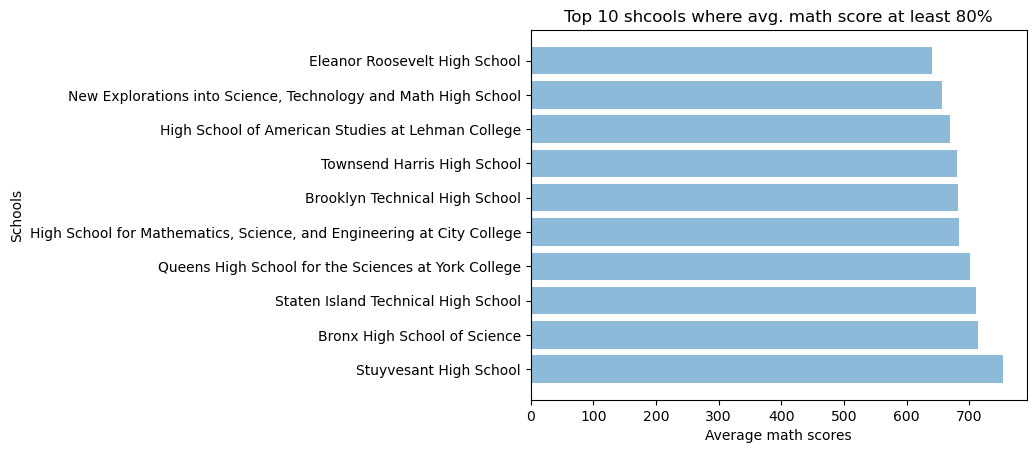

In [64]:
# Create horizontal bar chart
plt.barh('school_name', 'average_math', data=best_math_schools, alpha=0.5)

plt.xlabel('Average math scores')
plt.ylabel('Schools')
plt.title('Top 10 shcools where avg. math score at least 80%')

plt.show()

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:crimson;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:white;
              text-align:center;'>
        Who are the top 10 schools based on average results across reading, math, and writing?
    </h3>
    </div> 

In [15]:
# Find top 10 schools where high sum of total SAT scores

schools['total_SAT'] = schools['average_math']+schools['average_writing']+schools['average_reading']
top_10_schools = schools[:][['school_name','total_SAT']].sort_values(['total_SAT','school_name'], ascending=[False,True]).head(10)
print(top_10_schools)

                                           school_name  total_SAT
88                              Stuyvesant High School       2144
170                       Bronx High School of Science       2041
93                 Staten Island Technical High School       2041
174  High School of American Studies at Lehman College       2013
333                        Townsend Harris High School       1981
365  Queens High School for the Sciences at York Co...       1947
5                       Bard High School Early College       1914
280                     Brooklyn Technical High School       1896
45                       Eleanor Roosevelt High School       1889
68   High School for Mathematics, Science, and Engi...       1889


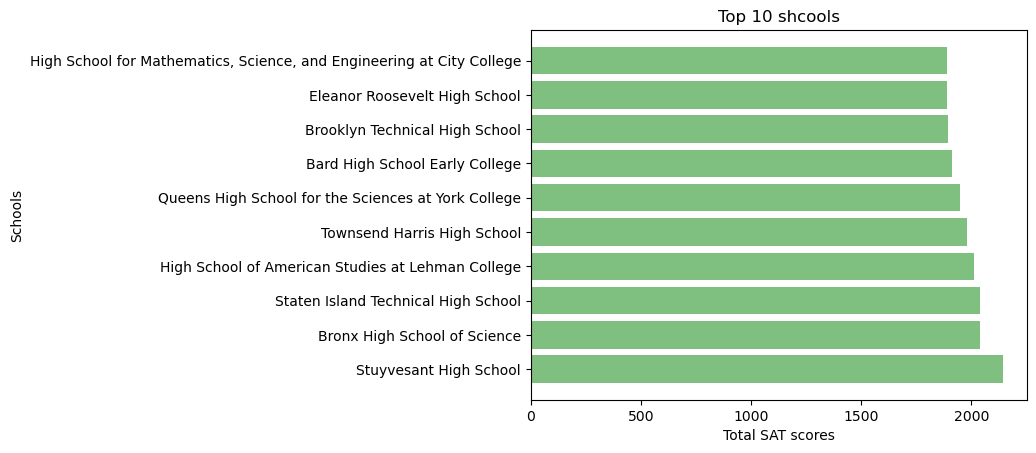

In [68]:
# Create bar chart
plt.barh('school_name', 'total_SAT', data=top_10_schools, alpha=0.5, color='green')

plt.xlabel('Total SAT scores')
plt.ylabel('Schools')
plt.title('Top 10 shcools')

plt.show()

<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:crimson;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:white;
              text-align:center;'>
        Which NYC borough has the largest standard deviation for SAT results?
    </h3>
    </div> 

In [16]:
# Find the largest std of borough

boroughs = schools.groupby('borough')['total_SAT'].agg(['count', 'mean', 'std']).round(2)
largest_std_dev = boroughs[boroughs['std'] == boroughs['std'].max()]
largest_std_dev = largest_std_dev.rename(columns={'count':'num_schools', 'mean':'average_SAT', 'std':'std_SAT'})
print(largest_std_dev)

           num_schools  average_SAT  std_SAT
borough                                     
Manhattan           89      1340.13   230.29


<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:crimson;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:white;
              text-align:center;'>
        Thank you
    </h3>
    </div> 